<a href="https://colab.research.google.com/github/RitwikRocks/Machine-Learning/blob/main/SVR(Support_Vector_Regresson).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the DataSet


In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")

Dividing the DataSet into Test Set and Training Set

In [ ]:
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
print(X)
print(type(X))


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
<class 'numpy.ndarray'>


In [ ]:
print(Y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
<class 'numpy.ndarray'>


In [15]:
Y = Y.reshape((len(Y),1))
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


For Support Vector Regression we have to both Feature scale Input and Output}

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [19]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [20]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Performing the SVR Support Vector Regression with insensitive tube error equal to  "RBF"

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X,Y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

To obtain the desired output we have to Reverse Feature scale the StandardScaler using the inverse_transform function

In [24]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualizing the Result of SVR

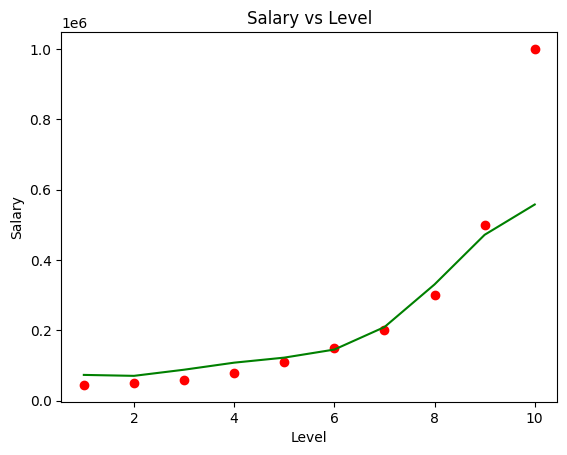

In [25]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='green')
plt.title("Salary vs Level")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Fine Tuning the Result

<ipython-input-29-c63f1c2c17de>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)


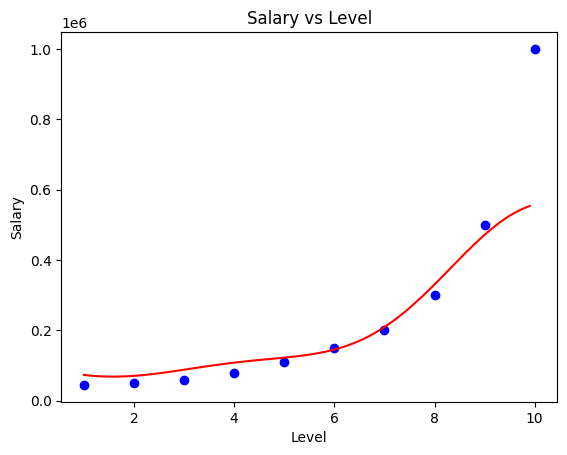

In [29]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color='blue')
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='red')
plt.title("Salary vs Level")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()
